In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d

In [2]:
base = pd.read_csv('./dados/trees.csv')
base.shape

(31, 3)

In [3]:
dfChic = pd.read_csv('dados/chicken.csv')
dfChic.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


In [5]:
dfEso = pd.read_csv('dados/esoph.csv')

In [6]:
dfOrch = pd.read_csv('dados/orchard.csv')
dfOrch.head()

,decrease,rowpos,colpos,treatment
0,57,1,1,D
1,95,2,1,E
2,8,3,1,B
3,69,4,1,H
4,92,5,1,G


### Numpy e Matplot Lib

In [9]:
h = np.histogram(base.iloc[:,1], bins = 6)
h

(array([4, 2, 5, 7, 9, 4], dtype=int64),
 array([63., 67., 71., 75., 79., 83., 87.]))

Text(0.5, 0, 'Altura')

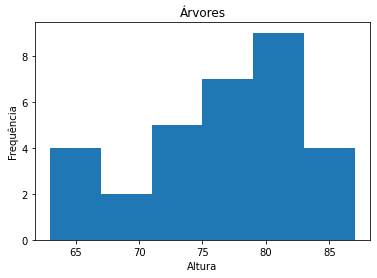

In [10]:
plt.hist(base.iloc[:,1], bins=6)
plt.title('Árvores')
plt.ylabel("Frequência")
plt.xlabel("Altura")

### Seaborn

C:\Users\matheus.scheffer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height'>

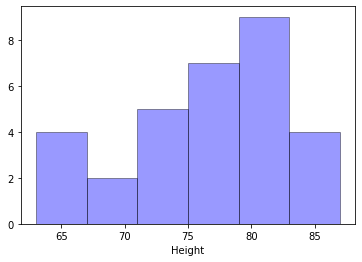

In [19]:
sns.distplot(base.iloc[:,1],
             bins = 6,
             kde=False, 
             hist=True,
             color='blue',
             hist_kws={'edgecolor': 'black'})

C:\Users\matheus.scheffer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

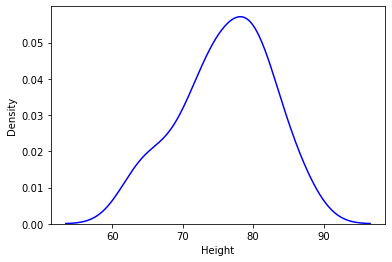

In [21]:
sns.distplot(base.iloc[:,1],
             bins = 6,
             kde=True, 
             hist=False,
             color='blue',
             hist_kws={'edgecolor': 'black'})

C:\Users\matheus.scheffer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

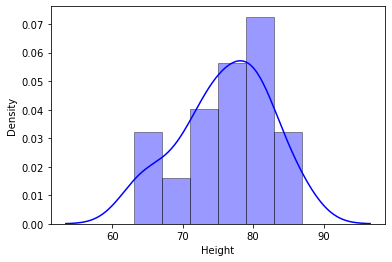

In [22]:
sns.distplot(base.iloc[:,1],
             bins = 6,
             kde=True, 
             hist=True,
             color='blue',
             hist_kws={'edgecolor': 'black'})

<AxesSubplot:xlabel='Height', ylabel='Count'>

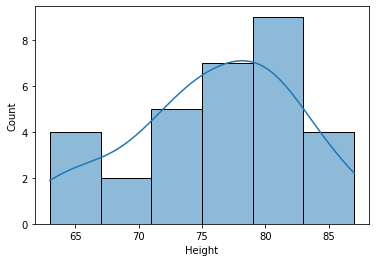

In [25]:
sns.histplot(data=base, x=base.Height, bins=6, kde=True)

In [97]:
grupo = dfChic.groupby('feed')['weight'].sum()
grupo

feed
casein       3883
horsebean    1602
linseed      2625
meatmeal     3046
soybean      3450
sunflower    3947
Name: weight, dtype: int64

In [98]:
dfChic.loc[dfChic['feed'] == 'horsebean']

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
5,168,horsebean
6,108,horsebean
7,124,horsebean
8,143,horsebean
9,140,horsebean


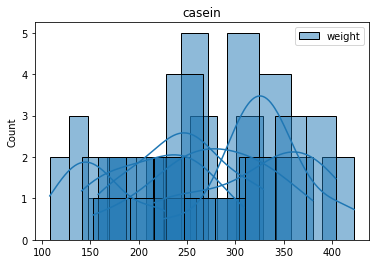

In [105]:
uniq = dfChic.feed.unique()

for feed in uniq:
    sns.histplot(dfChic.loc[dfChic['feed'] == feed], bins=6, kde=True).set_title(feed)

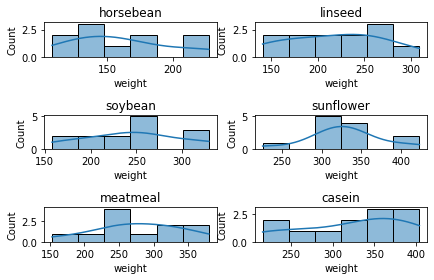

In [117]:
l = len(uniq)
plt.figure(1)
for i in range(l):
    plt.subplot(3,2,i+1)
    feed = uniq[i]
    sns.histplot(dfChic.loc[dfChic['feed'] == feed].weight, bins=6, kde=True).set_title(feed)
plt.tight_layout()

## Gráfico de Dispersão

### MatplotLib

Text(0.5, 0, 'Volume')

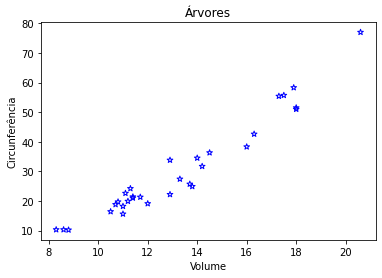

In [27]:
plt.scatter(base.Girth, base.Volume, color = 'blue', facecolors='none',marker="*")
plt.title('Árvores')
plt.ylabel("Circunferência")
plt.xlabel("Volume")

Text(0.5, 0, 'Volume')

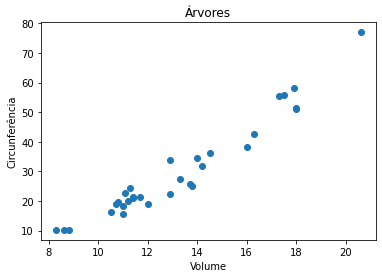

In [5]:
plt.scatter(base.Girth, base.Volume)
plt.title('Árvores')
plt.ylabel("Circunferência")
plt.xlabel("Volume")

### Seaborn


<AxesSubplot:xlabel='Girth', ylabel='Volume'>

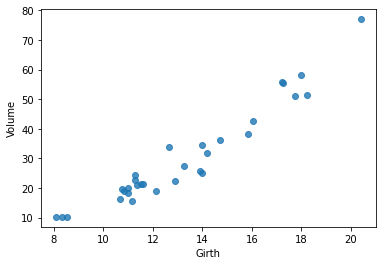

In [8]:
sns.regplot(x='Girth', y='Volume', data=base, x_jitter=0.3, fit_reg=False)

## Trabalhando com variáveis categóricas em um Gráfico de Dispersão

Os "pontos" apresentados em um gráfico de dispersão são variáveis contínuas. Porém, conseguimos produzir uma "label" no gráfico para cada ponto apontando uma variável **categórica** correspondente:

In [9]:
dfCo2 = pd.read_csv('dados/co2.csv')

In [10]:
dfCo2.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


In [13]:
#Valores únicos:
print(dfCo2.Treatment.unique())
#ou
set(dfCo2.Treatment)

['nonchilled' 'chilled']


{'chilled', 'nonchilled'}

In [14]:
x = dfCo2.conc
y = dfCo2.uptake
uni = list(set(dfCo2.Treatment))

0    False
1    False
2    False
3    False
4    False
Name: Treatment, dtype: bool
0    True
1    True
2    True
3    True
4    True
Name: Treatment, dtype: bool


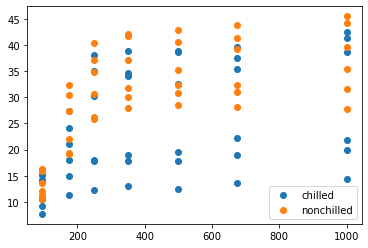

In [24]:
for i in range(len(uni)):
    indice = dfCo2.Treatment == uni[i]
    plt.scatter(x[indice], y[indice], label = uni[i])
plt.legend(loc = 'lower right')

### Seaborn

<AxesSubplot:xlabel='conc', ylabel='uptake'>

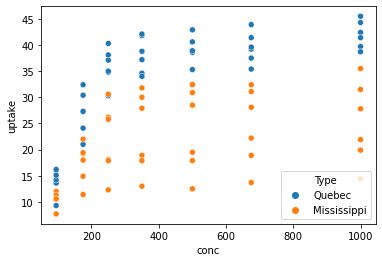

In [120]:
sns.scatterplot(x=dfCo2.conc, y=dfCo2.uptake, hue=dfCo2.Type)

In [125]:
tUniq = dfCo2.Type.unique()

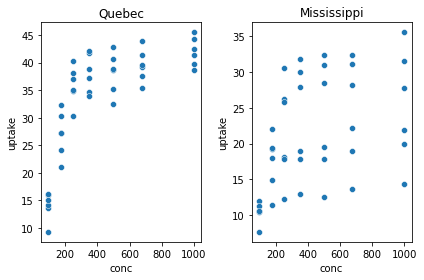

In [127]:
plt.figure(1)
for i in range(len(tUniq)):
    df = dfCo2[dfCo2.Type == tUniq[i]]
    plt.subplot(1,2,i+1)
    sns.scatterplot(x = df.conc, y=df.uptake).set_title(tUniq[i])
plt.tight_layout()

In [133]:
tratUniq = dfCo2.Treatment.unique()

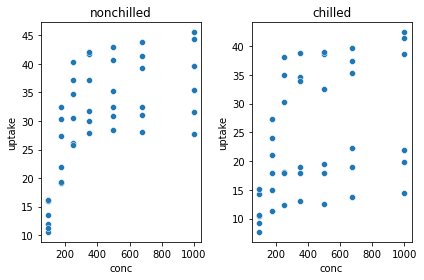

In [137]:
plt.figure(1)

for i in range(len(tratUniq)):
    df = dfCo2[dfCo2.Treatment == tratUniq[i]]
    plt.subplot(1,2,i+1)
    sns.scatterplot(x = df.conc, y =df.uptake).set_title(tratUniq[i])
plt.tight_layout()

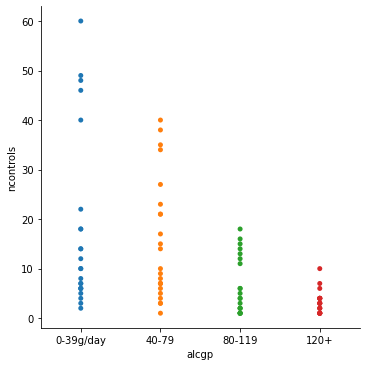

In [143]:
sns.catplot(x = 'alcgp', y = 'ncontrols', data = dfEso, jitter = False)

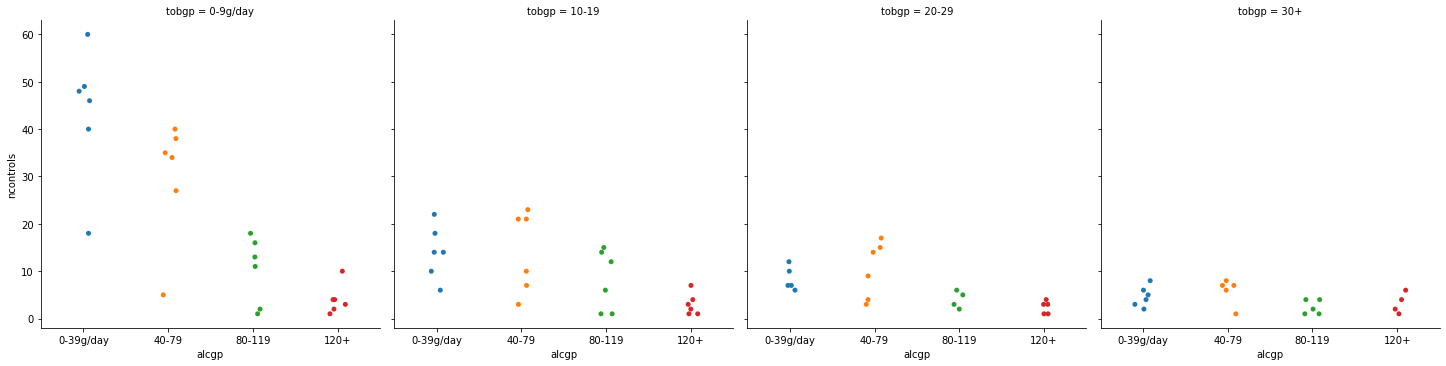

In [144]:
sns.catplot(x = 'alcgp', y = 'ncontrols', data = dfEso,col='tobgp')

### Plotando vários gráficos
Como o gráfico de dispersão só compara duas variáveis contínuas, há a necessidade de plotarmos o mesmo várias vezes para compararmos todas as variáveis:

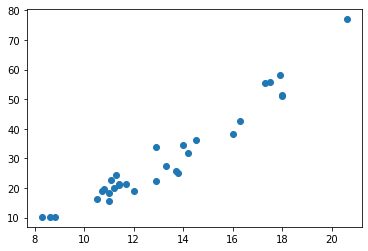

In [26]:
plt.scatter(base.Girth, base.Volume)

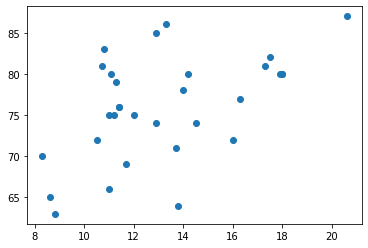

In [28]:
plt.scatter(base.Girth, base.Height)


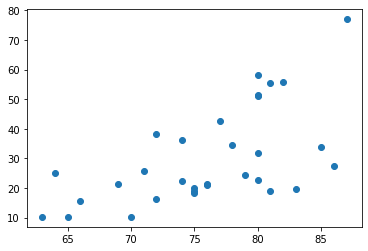

In [29]:
plt.scatter(base.Height, base.Volume)

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <BarContainer object of 10 artists>)

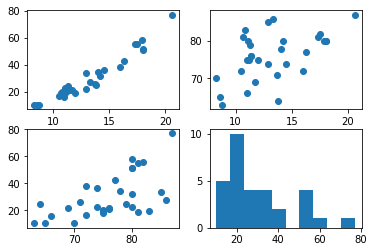

In [33]:
plt.figure(1)
plt.subplot(2,2,1)
plt.scatter(base.Girth, base.Volume)
plt.subplot(2,2,2)
plt.scatter(base.Girth, base.Height)
plt.subplot(2,2,3)
plt.scatter(base.Height, base.Volume)
plt.subplot(2,2,4)
plt.hist(base.Volume)

In [57]:
t = ((base.Girth, base.Volume), (base.Girth, base.Height), (base.Height, base.Volume))

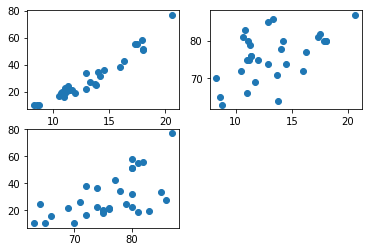

In [62]:
l = len(t)

plt.figure(1)
for i in range(l):
    plt.subplot(l-1,2, i+1)
    plt.scatter(t[i][0], t[i][1])

Scatter em 3D

Text(0.5, 0, 'Colpos')

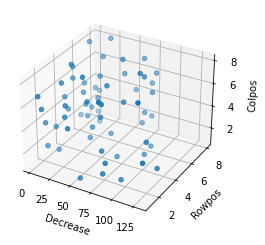

In [16]:
fig = plt.figure()
eixo = fig.add_subplot(1,1,1, projection ='3d')

eixo.scatter(dfOrch.decrease, dfOrch.rowpos, dfOrch.colpos)

eixo.set_xlabel('Decrease')
eixo.set_ylabel('Rowpos')
eixo.set_zlabel('Colpos')

## Boxplot

### Matplotlib

Text(0.5, 1.0, 'Volumes')

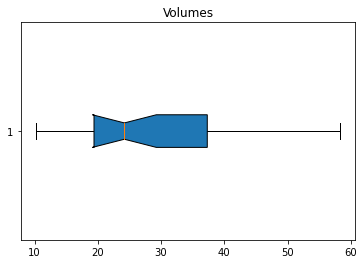

In [64]:
plt.boxplot(base.Volume, vert = False, showfliers=False, notch=True, patch_artist=True)
plt.title('Árvores')
plt.title('Volumes')

Text(0.5, 1.0, 'Volumes')

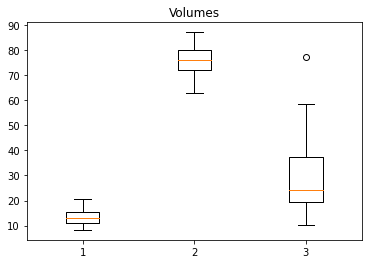

In [66]:
plt.boxplot(base)
plt.title('Árvores')
plt.title('Volumes')

Text(0.5, 1.0, 'Árvores')

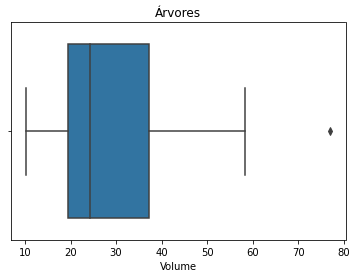

In [92]:
sns.boxplot(x=base.Volume).set_title('Árvores')

Text(0.5, 1.0, 'Árvores')

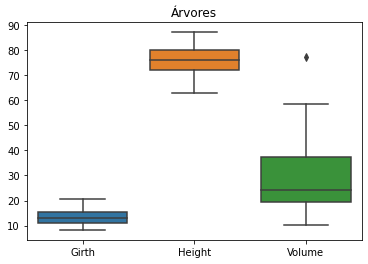

In [94]:
sns.boxplot(data=base).set_title('Árvores')

## Gráfico de Barras

### Matplot

In [74]:
dfIns = pd.read_csv('dados/insect.csv')
dfIns.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


Para produzirmos estes gráficos, precisamos agrupar os dados:

In [83]:
grupo = dfIns.groupby('spray')['count'].sum()
grupo.head()

spray
A    174
B    184
C     25
D     59
E     42
Name: count, dtype: int64

<AxesSubplot:xlabel='spray'>

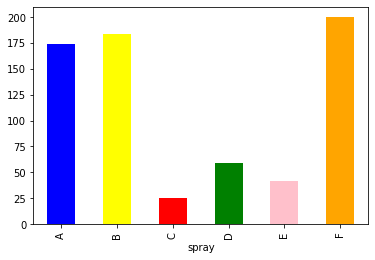

In [85]:
grupo.plot.bar(color=['blue', 'yellow','red','green','pink','orange'])

## Setores

### Matplot

<AxesSubplot:ylabel='count'>

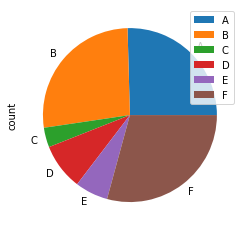

In [87]:
grupo.plot.pie(legend=True)